<a href="https://colab.research.google.com/github/AbdurRahman22224/Amazon-ML-Challeneg/blob/main/notebook_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('train.csv')

In [ ]:
# df[['numeric_value', 'unit']] = df['entity_value'].apply(lambda x: pd.Series(handle_range(x)))

#### Units Allowed

In [ ]:
entity_unit_map = {
    'width': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
    'depth': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
    'height': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
    'item_weight': {'gram',
        'kilogram',
        'microgram',
        'milligram',
        'ounce',
        'pound',
        'ton'},
    'maximum_weight_recommendation': {'gram',
        'kilogram',
        'microgram',
        'milligram',
        'ounce',
        'pound',
        'ton'},
    'voltage': {'kilovolt', 'millivolt', 'volt'},
    'wattage': {'kilowatt', 'watt'},
    'item_volume': {'centilitre',
        'cubic foot',
        'cubic inch',
        'cup',
        'decilitre',
        'fluid ounce',
        'gallon',
        'imperial gallon',
        'litre',
        'microlitre',
        'millilitre',
        'pint',
        'quart'}
}

allowed_units = [unit for entity in entity_unit_map for unit in entity_unit_map[entity]]
entity_types = [entity for entity in entity_unit_map.keys()]
unique_units = set(allowed_units)
print(len(unique_units))
print(len(allowed_units))

31
50


##### Splitting entity value

In [ ]:
df['entity_name'] = df['entity_name'].astype('str')
# Function to split entity_value into numeric value and unit
import ast
import re
def handle_range(value):
    value = value.strip()
    try:
        # Check if the string represents a list, e.g., "[100.0, 240.0] volt"
        # print(value)
        value = value.replace('"', '')
        value = value.replace("'", '')
        value = value.replace(",", '')
        # print(value)
        if value.startswith('[') and ']' in value:
            # Extract the part before and after the closing bracket
            list_part, unit = value.split('] ')
            list_part += ']'  # Add back the closing bracket to the list part

            # Handle cases where the list might not have a comma
            list_part = list_part.replace(' ', ',')  # Replace spaces with commas
            value_list = ast.literal_eval(list_part)

            average_value = sum(value_list) / 2
            return average_value, unit
        elif 'to' in value and not 'ton' in value:
            # Handle range of values, e.g., '10 to 20 kg'
            parts = value.split(' to ')
            value = value.replace(",", '')
            num1 = float(parts[0].split()[0])
            # num2 = float(parts[1].split()[0])
            match = re.match(r'(\d+\.?\d*)\s*([a-zA-Z]+)', parts[1])
            num2 = float(match.group(1))
            unit = match.group(2)
            average_value = (num1 + num2) / 2
            return average_value, unit

        else:
            # Handle single value, e.g., '15 kg'
            parts = value.split(' ', 1)
            numeric_value = float(parts[0])
            unit = parts[1]
            return numeric_value, unit

    except (ValueError, SyntaxError, IndexError) as e:
        # Handle possible parsing errors
        print(f"Error parsing value '{value}': {e}")
        return None, None

# Apply the function and assign to new columns using pd.Series
df[['numeric_value', 'unit']] = df['entity_value'].apply(lambda x: pd.Series(handle_range(x)))



In [ ]:
df['unit'].nunique()
# df['entity_name'].nunique()


35

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the 'unit' column
unit_encoded = encoder.fit_transform(df[['unit']])
unit_encoded_df = pd.DataFrame(unit_encoded, columns=encoder.categories_[0])

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df1 = pd.concat([df, unit_encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df1.head()

,image_link,group_id,entity_name,entity_value,numeric_value,unit,entity_sequences,pound,candela,carat,...,nits,ounce,person,pint,pound,quart,ton,volt,watt,None
0,https://m.media-amazon.com/images/I/61MgpUoj+V...,523149,item_weight,9999.0 kilogram,9999.0,kilogram,"[1, 2, 0]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://m.media-amazon.com/images/I/61mT+JWCRl...,731432,item_weight,9990.0 milligram,9990.0,milligram,"[1, 2, 0]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://m.media-amazon.com/images/I/61aQ+YPSBk...,731432,item_weight,9990.0 milligram,9990.0,milligram,"[1, 2, 0]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,https://m.media-amazon.com/images/I/71jDQBNUki...,731432,item_weight,9990.0 milligram,9990.0,milligram,"[1, 2, 0]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://m.media-amazon.com/images/I/61sKtp0eKW...,524635,item_weight,999.0 ounce,999.0,ounce,"[1, 2, 0]",0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Tokenizer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare tokenizer for entity types
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df1['entity_name'])  # `entity_types` should be a list of all unique entity names
df1['entity_sequences'] = tokenizer.texts_to_sequences(df1['entity_name'])
padded_sequences = pad_sequences(df1['entity_sequences'], padding='post')
df1['entity_sequences'] = list(padded_sequences)

### Loading Model

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D
# Define the CNN model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[-30:]:  # Unfreeze the last 20 layers, for example
    layer.trainable = True

# CNN feature extractor
cnn_input = Input(shape=(224, 224, 3))
x = base_model(cnn_input, training=True)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

x = Flatten()(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)  # Adjust size as needed
x = BatchNormalization()(x)
cnn_features = Dense(256, activation='relu')(x)  # Adjust size as needed


In [ ]:
padded_sequences.shape[1]

3

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Concatenate


# Define the RNN/LSTM model
entity_input = Input(shape=(padded_sequences.shape[1],))  # Length of entity_sequences
x = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50)(entity_input)
x = LSTM(128, return_sequences=True)(x)
x = LSTM(64, return_sequences=False)(x)
entity_features = Dense(128, activation='relu')(x)


In [ ]:
# Combine CNN and entity features
combined_features = Concatenate()([cnn_features, entity_features])
combined_features = Dense(128, activation='relu')(combined_features)

# Output: regression for value and classification for unit
value_output = Dense(1, activation='linear', name='value_output')(combined_features)
unit_output = Dense(35, activation='softmax', name='unit_output')(combined_features)

# Define the model
model = Model(inputs=[cnn_input, entity_input], outputs=[value_output, unit_output])


In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ efficientnetb0            │ (None, 7, 7, 1280)     │      4,049,571 │ input_layer_3[0][0]    │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 7, 7, 1280)     │              0 │ efficientnetb0[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 7, 7, 1280)     │          5,120 │ dropout_2[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 62720)          │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 62720)          │        250,880 │ flatten_1[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_4             │ (None, 3)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 62720)          │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 3, 50)          │            550 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 256)            │     16,056,576 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 3, 128)         │         91,648 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 256)            │          1,024 │ dense_2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 64)             │         49,408 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 256)            │         65,792 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 128)            │          8,320 │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 384)            │              0 │ dense_3[0][0],         │
│ (Concatenate)             │                        │                │ dense_4[0][0]          │
├──────────────────────

 Total params: 20,632,813 (78.71 MB)

 Trainable params: 20,462,278 (78.06 MB)

 Non-trainable params: 170,535 (666.16 KB)

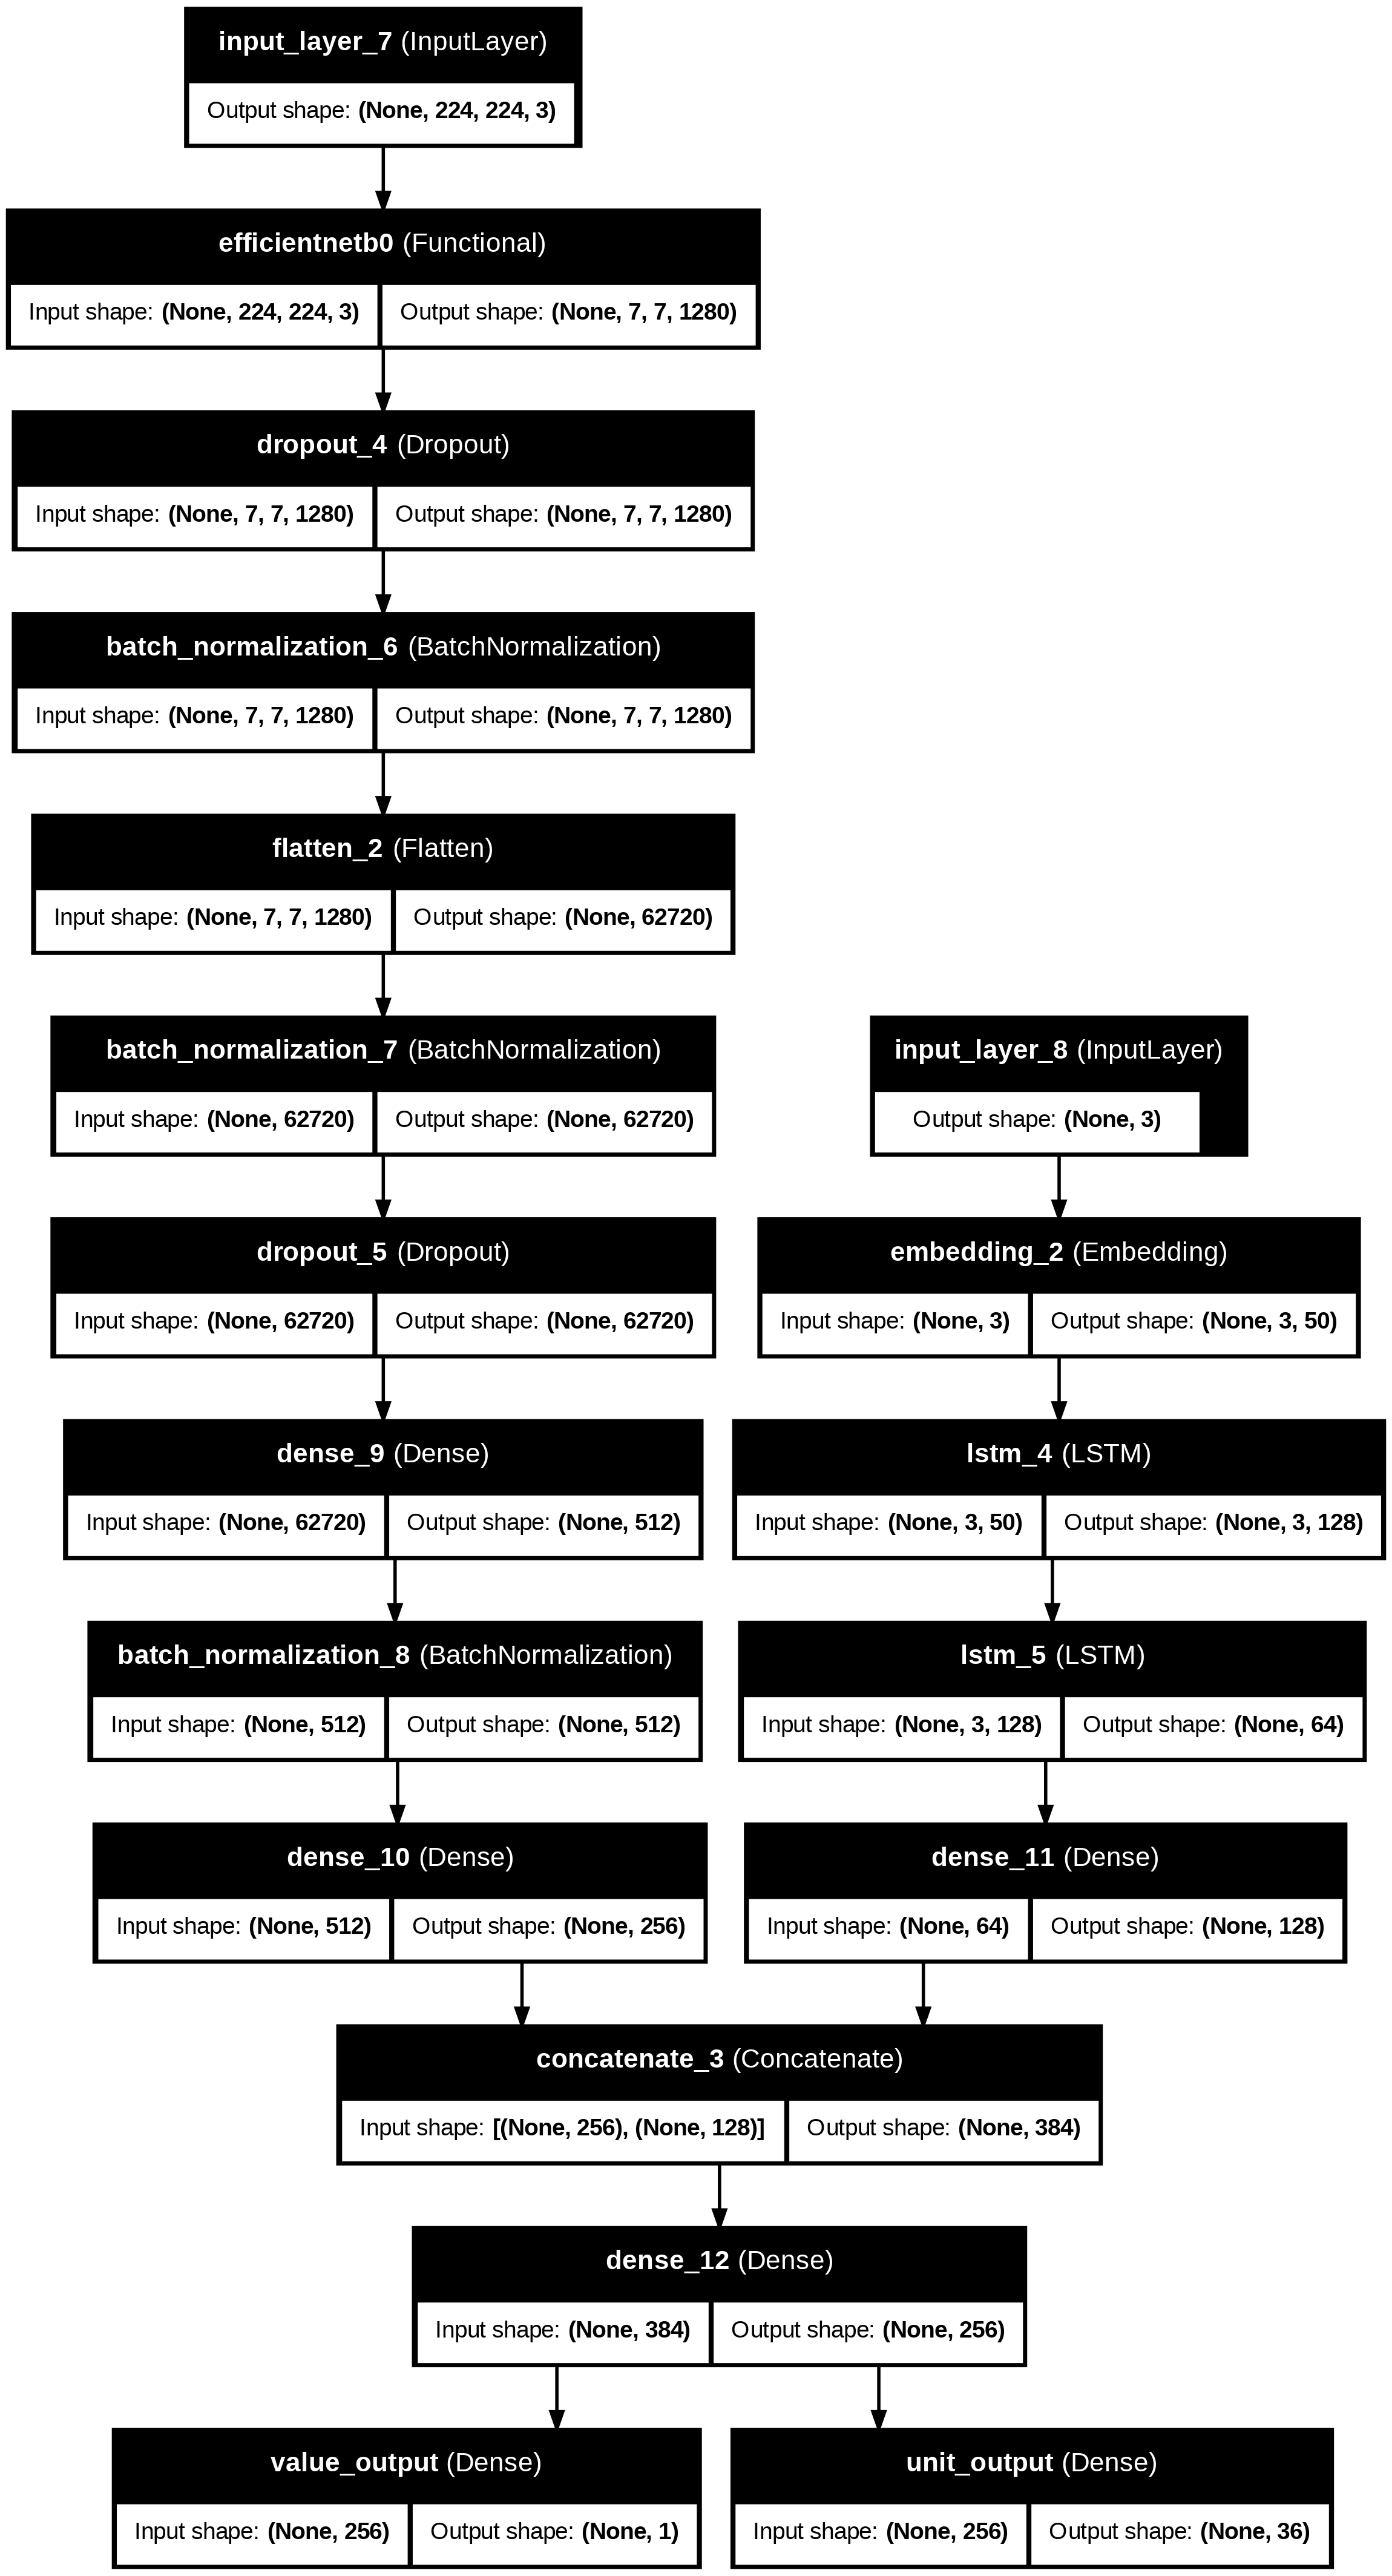

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

### Generator

In [ ]:
import requests
from PIL import Image, UnidentifiedImageError
from io import BytesIO
import numpy as np
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

class URLDataGenerator(Sequence):
    def __init__(self, dataframe, entity_sequences, numeric_values, units_one_hot, batch_size, target_size=(224, 224)):
        self.dataframe = dataframe
        self.entity_sequences = entity_sequences
        self.numeric_values = numeric_values
        self.units_one_hot = units_one_hot
        self.batch_size = batch_size
        self.target_size = target_size  # Image target size for resizing (224, 224)
        # self.placeholder_image = np.ones((target_size[0], target_size[1], 3), dtype=np.float32)  # White image (all ones)

    def __len__(self):
        return int(np.floor(len(self.dataframe) / self.batch_size))

    def __getitem__(self, index):
        # Get batch data from dataframe
        batch_df = self.dataframe.iloc[index * self.batch_size:(index + 1) * self.batch_size]

        # Determine dimensions
        entity_dim = self.entity_sequences.shape[1]  # Use the length of arrays in entity_sequences
        image_batch = np.zeros((self.batch_size, *self.target_size, 3), dtype=np.float32)
        entity_batch = np.zeros((self.batch_size, entity_dim), dtype=np.float32)
        value_batch = np.zeros((self.batch_size,), dtype=np.float32)
        unit_batch = np.zeros((self.batch_size, self.units_one_hot.shape[1]), dtype=np.float32)

        for i, row in enumerate(batch_df.itertuples()):
            # Download image from URL
            image_url = getattr(row, 'image_link')
            try:
                response = requests.get(image_url)
                img = Image.open(BytesIO(response.content))
                img = img.resize(self.target_size)
                # Convert image to RGB if it's not
                if img.mode != 'RGB':
                    img = img.convert('RGB')
                img = np.array(img) / 255.0  # Normalize the image

                # Assign image to batch
                image_batch[i] = img
            except (requests.exceptions.RequestException, UnidentifiedImageError, OSError):
                # Log error and assign placeholder image, then continue with the next image
                print(f"Error loading image: {image_url}. Using placeholder and continuing.")
                # image_batch[i] = self.placeholder_image
                # continue  # Continue to the next image in case of failure

            # Use numpy indexing
            entity_value = self.entity_sequences[i + index * self.batch_size]  # Positional indexing
            value_batch[i] = self.numeric_values[i + index * self.batch_size]
            # unit_batch = self.units_one_hot[i + index * self.batch_size]

            entity_batch[i] = entity_value
            unit_batch = np.zeros((self.batch_size, 35), dtype=np.float32)
            for i in range(self.batch_size):
                # Ensure each element is a single value (e.g., by taking the first element if it's a list)
                unit_value = self.units_one_hot[i + index * self.batch_size]
                if isinstance(unit_value, (list, np.ndarray)):
                    unit_value = unit_value[0]  # Or handle the sequence appropriately
                unit_batch[i] = np.array(unit_value, dtype=np.float32)


        return (image_batch, entity_batch), (value_batch, unit_batch)

    def on_epoch_end(self):
        # This function can be used to shuffle data at the end of each epoch
        pass

    def __iter__(self):
        # Makes the class an iterable generator
        for i in range(len(self)):
            yield self.__getitem__(i)






In [ ]:
df1.columns

Index([      'image_link',         'group_id',      'entity_name',
           'entity_value',    'numeric_value',             'unit',
       'entity_sequences',           ' pound',          'candela',
                  'carat',       'centilitre',       'centimetre',
             'cubic foot',       'cubic inch',              'cup',
              'decilitre',      'fluid ounce',             'foot',
                 'gallon',         'gigabyte',             'gram',
             'horsepower',             'inch',         'kilogram',
               'kilowatt',    'kilowatt hour',            'litre',
                  'metre',        'microgram', 'milliampere hour',
              'milligram',       'millilitre',       'millimetre',
                   'nits',            'ounce',           'person',
                   'pint',            'pound',            'quart',
                    'ton',             'volt',             'watt',
                     None],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df1.iloc[:,7:]

# df['unit'].unique()

,candela,carat,centilitre,centimetre,cubic foot,cubic inch,cup,decilitre,fluid ounce,foot,...,nits,ounce,person,pint,pound,quart,ton,volt,watt,entity_sequences
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 2, 0]"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 2, 0]"
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 2, 0]"
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 2, 0]"
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 2, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[6, 0, 0]"
263855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 2, 0]"
263856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 2, 0]"
263857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 2, 0]"


In [ ]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df1, test_size=0.2, random_state=42)

In [ ]:
# Convert the columns to numpy arrays if they aren't already
train_entity_sequences = np.array(train_df['entity_sequences'].tolist())
train_numeric_values = np.array(train_df['numeric_value'])
train_units_one_hot = np.array(train_df.iloc[:,7:])

val_entity_sequences = np.array(val_df['entity_sequences'].tolist())
val_numeric_values = np.array(val_df['numeric_value'])
val_units_one_hot = np.array(val_df.iloc[:,7:])


In [ ]:
val_units_one_hot.shape[1]

35

In [ ]:
import tensorflow as tf

# Define the output signature
output_signature = (
    (
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),    # Image batch
        tf.TensorSpec(shape=(None, 3), dtype=tf.float32)               # Entity batch
    ),
    (
        tf.TensorSpec(shape=(None,), dtype=tf.float32),                # Numeric values batch
        tf.TensorSpec(shape=(None, 35), dtype=tf.float32)              # Unit one-hot encoded batch
    )
)


In [ ]:
# Example usage:
train_generator = URLDataGenerator(train_df, train_entity_sequences, train_numeric_values, train_units_one_hot, batch_size=32)
val_generator = URLDataGenerator(val_df, val_entity_sequences, val_numeric_values, val_units_one_hot, batch_size=32)


train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=output_signature
)

val_dataset = tf.data.Dataset.from_generator(
    lambda: val_generator,
    output_signature=output_signature
)


In [ ]:
model.compile(optimizer='adam',
              loss={'value_output': 'mean_squared_error', 'unit_output': 'categorical_crossentropy'},
              metrics={'value_output': 'mse', 'unit_output': 'accuracy'})



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback to save the model at each epoch or when a condition is met
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Amazon_ML/model.keras',  # Path to save the model
    monitor='val_loss',            # Metric to monitor (e.g., validation loss)
    save_best_only=True,           # Save only the best model
    mode='min',                    # Mode (minimizing loss)
    verbose=1                      # Verbosity level
)

# Include the callback in model.fit()
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,
    steps_per_epoch = len(train_generator),
    validation_steps = len(val_generator),
    callbacks=[checkpoint]  # Add checkpoint callback here
)


Epoch 1/5
 370/6596 ━━━━━━━━━━━━━━━━━━━━ 4:06:05 2s/step - loss: 15610994021540562993152.0000 - unit_output_accuracy: 0.0271 - value_output_mse: 15610994021540562993152.0000Error loading image: https://m.media-amazon.com/images/I/PBWKX4CRl2o.jpg. Using placeholder and continuing.
 565/6596 ━━━━━━━━━━━━━━━━━━━━ 3:58:11 2s/step - loss: 22593931078369760247808.0000 - unit_output_accuracy: 0.0239 - value_output_mse: 22593931078369760247808.0000Error loading image: https://m.media-amazon.com/images/I/DzP2RMRQO0.jpg. Using placeholder and continuing.
1214/6596 ━━━━━━━━━━━━━━━━━━━━ 3:33:09 2s/step - loss: 536180257476630573995786240.0000 - unit_output_accuracy: 0.0235 - value_output_mse: 536180257476630573995786240.0000Error loading image: https://m.media-amazon.com/images/I/VjCkaPeR1o.jpg. Using placeholder and continuing.
1426/6596 ━━━━━━━━━━━━━━━━━━━━ 3:25:20 2s/step - loss: nan - unit_output_accuracy: 0.0321 - value_output_mse: nanError loading image: https://m.media-amazon.com/images/I/R

In [ ]:
# history = model.fit(
#     train_dataset,
#     validation_data = val_dataset,
#     epochs=5,
#     steps_per_epoch = len(train_generator),
#     validation_steps = len(val_generator),
#     verbose=1
# )


Epoch 1/5
 370/6596 ━━━━━━━━━━━━━━━━━━━━ 3:25:51 2s/step - loss: 15610994021540562993152.0000 - unit_output_accuracy: 0.2526 - value_output_mse: 15610994021540562993152.0000

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) UNKNOWN:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7cc346c69ee0>
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "<ipython-input-73-fc8227effe7e>", line 61, in __iter__
    yield self.__getitem__(i)

  File "<ipython-input-73-fc8227effe7e>", line 35, in __getitem__
    img = Image.open(BytesIO(response.content))

  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3283, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7cc346c69ee0>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_6]]
  (1) UNKNOWN:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7cc346c69ee0>
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "<ipython-input-73-fc8227effe7e>", line 61, in __iter__
    yield self.__getitem__(i)

  File "<ipython-input-73-fc8227effe7e>", line 35, in __getitem__
    img = Image.open(BytesIO(response.content))

  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3283, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7cc346c69ee0>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_one_step_on_iterator_161284]

In [ ]:
# Save the model in SavedModel format
model.save('/content/drive/MyDrive/amazon_model.keras')


Exception ignored in: <function _xla_gc_callback at 0x7cc430254ca0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [ ]:
sample_inputs, sample_outputs =next(iter(train_generator))

print("Sample input shapes:", [arr.shape for arr in sample_inputs])
print("Sample output shapes:", [arr.shape for arr in sample_outputs])


Sample input shapes: [(32, 224, 224, 3), (32, 2)]
Sample output shapes: [(32,), (32, 11)]


### Prediction

In [ ]:
def preprocess_image(image_url, target_size=(224, 224)):
    """Download and preprocess image from the URL."""
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)
    img = np.array(img) / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def preprocess_entity(entity_name, tokenizer):
    """Tokenize and pad the entity name."""
    sequence = tokenizer.texts_to_sequences([entity_name])
    padded_sequence = pad_sequences(sequence, padding='post')
    return padded_sequence

def predict(image_url, entity_name, model, tokenizer, unit_index_to_label):
    """Predict numeric value and unit for the given image and entity."""
    # Preprocess image
    preprocessed_image = preprocess_image(image_url)

    # Preprocess entity
    preprocessed_entity = preprocess_entity(entity_name, tokenizer)

    # Get predictions from the model
    numeric_value_pred, pred_unit_class = model.predict([preprocessed_image, preprocessed_entity])

    # Get predicted numeric value (regression output)
    predicted_value = numeric_value_pred[0][0]  # Since it's a batch of 1
    pred_unit = ALLOWED_UNITS[np.argmax(pred_unit_class)]  # Get unit label
    # Get predicted unit (classification output)
    predicted_unit_index = np.argmax(unit_pred, axis=1)[0]  # Index of the highest probability
    predicted_unit = unit_index_to_label[predicted_unit_index]  # Convert index to unit label

    # Format the prediction as "x unit"
    prediction = f"{predicted_value:.2f} {predicted_unit}"
    return prediction

In [ ]:
# # Predict on test data
unit_index_to_label = {0: 'kg', 1: 'gram', 2: 'centimetre', 3: 'ounce'} #example

# Example image URL and entity
image_url = "https://m.media-amazon.com/images/I/61I9XdN6OFL.jpg"
entity_name = "item_weight"

# Predict the value and unit
prediction = predict(image_url, entity_name, model, tokenizer, unit_index_to_label=unit_index_to_label)

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
8.03 ounce
